##  Importing important libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

In [2]:

df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### There are some missing values but according to data dictonary some values are not present and named as NA they are not missing values so changing them with None

In [5]:
df[['Alley','BsmtQual','BsmtCond','BsmtExposure',
    'BsmtFinType1','BsmtFinType2','FireplaceQu','GarageType',
    'GarageFinish','GarageQual','GarageCond','PoolQC','Fence',
    'MiscFeature']] = df[['Alley','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                          'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC',
                          'Fence','MiscFeature']].fillna('None')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# checking null values
100*(df.isnull().sum()/len(df)).nlargest(20)

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotArea          0.000000
Street           0.000000
Alley            0.000000
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
dtype: float64

In [8]:
# removing null values
df.dropna(inplace=True)

In [9]:
# checking null values
100*(df.isnull().sum()/len(df)).nlargest(20)

Id              0.0
MSSubClass      0.0
MSZoning        0.0
LotFrontage     0.0
LotArea         0.0
Street          0.0
Alley           0.0
LotShape        0.0
LandContour     0.0
Utilities       0.0
LotConfig       0.0
LandSlope       0.0
Neighborhood    0.0
Condition1      0.0
Condition2      0.0
BldgType        0.0
HouseStyle      0.0
OverallQual     0.0
OverallCond     0.0
YearBuilt       0.0
dtype: float64

In [10]:
# droping ID and Utilities
df = df.drop(['Id','Utilities'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1120 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1120 non-null   int64  
 1   MSZoning       1120 non-null   object 
 2   LotFrontage    1120 non-null   float64
 3   LotArea        1120 non-null   int64  
 4   Street         1120 non-null   object 
 5   Alley          1120 non-null   object 
 6   LotShape       1120 non-null   object 
 7   LandContour    1120 non-null   object 
 8   LotConfig      1120 non-null   object 
 9   LandSlope      1120 non-null   object 
 10  Neighborhood   1120 non-null   object 
 11  Condition1     1120 non-null   object 
 12  Condition2     1120 non-null   object 
 13  BldgType       1120 non-null   object 
 14  HouseStyle     1120 non-null   object 
 15  OverallQual    1120 non-null   int64  
 16  OverallCond    1120 non-null   int64  
 17  YearBuilt      1120 non-null   int64  
 18  YearRemo

In [12]:
#some columns are categorical but data types are int so changing into object

df['MSSubClass'] = df['MSSubClass'].astype('object')
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')

## Performing EDA

In [13]:
cat1 = df.select_dtypes(include=['object'])
cat1.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

#### Performing Univariate analysis

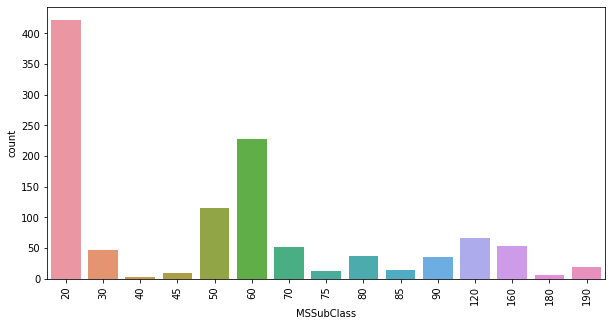

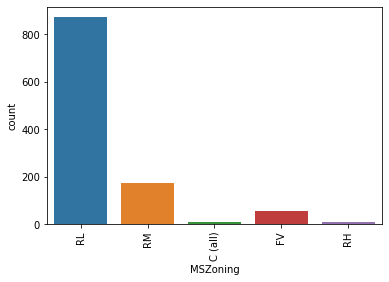

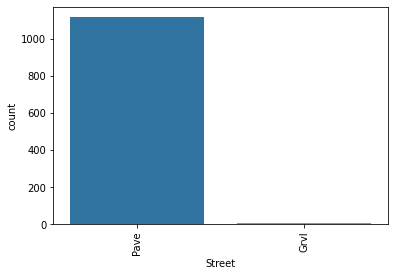

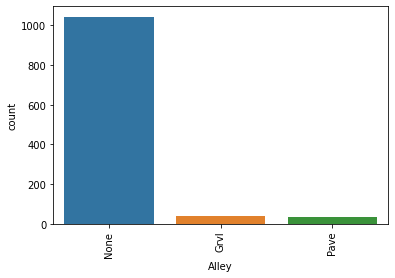

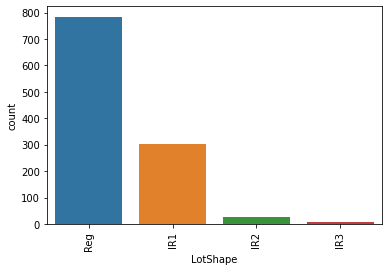

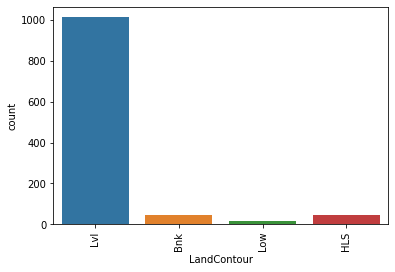

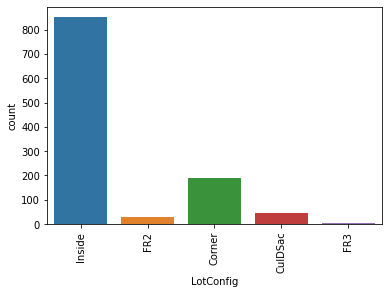

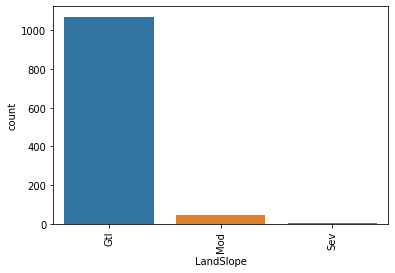

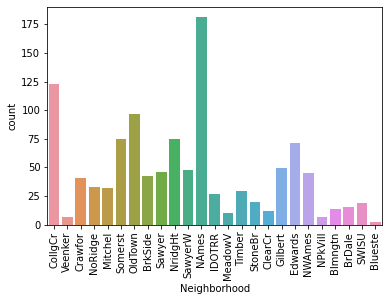

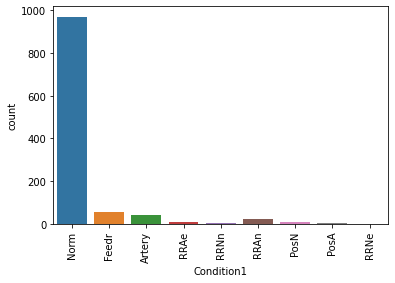

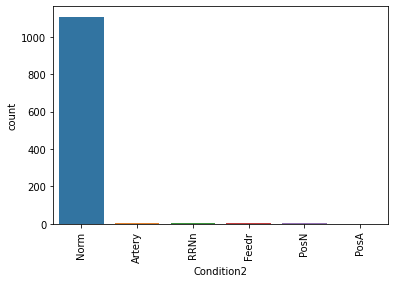

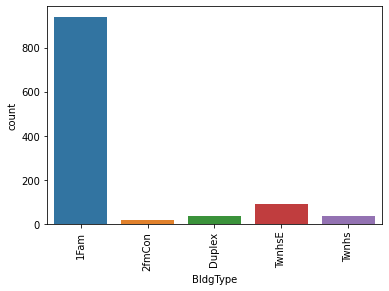

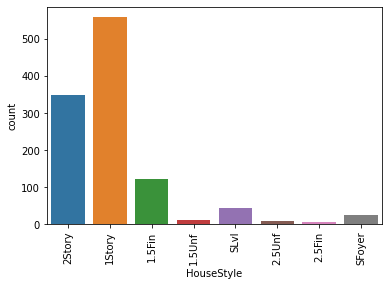

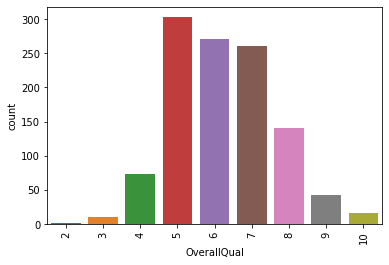

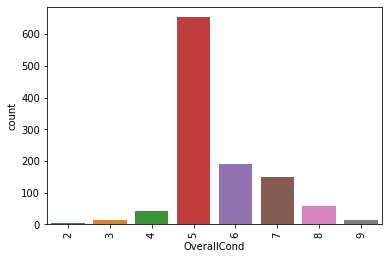

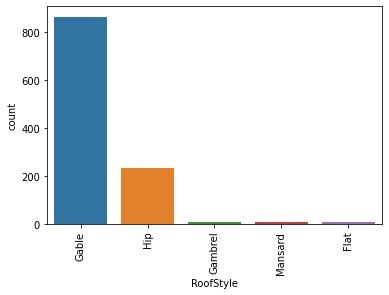

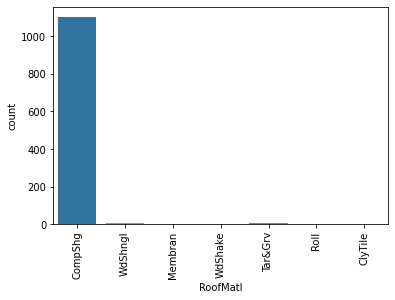

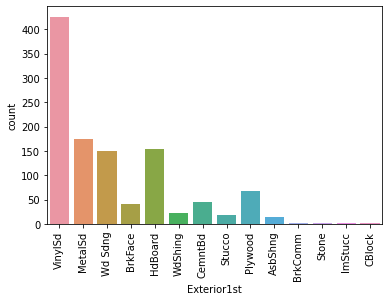

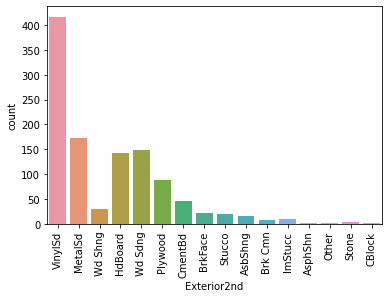

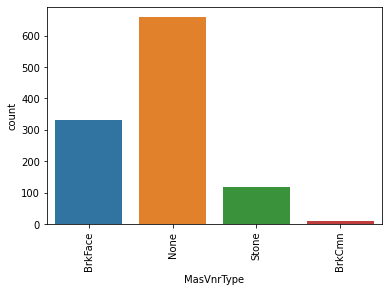

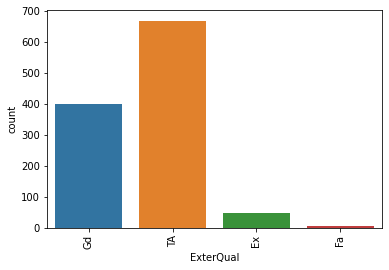

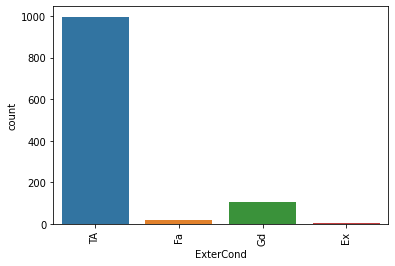

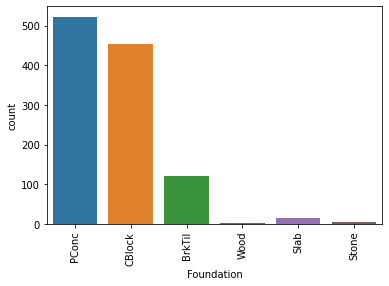

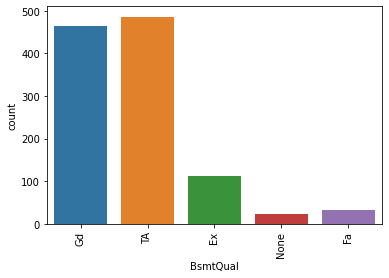

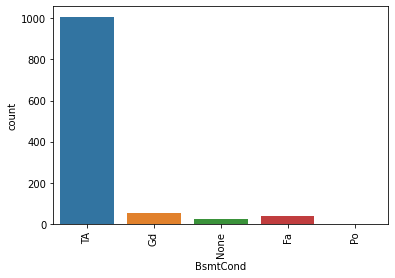

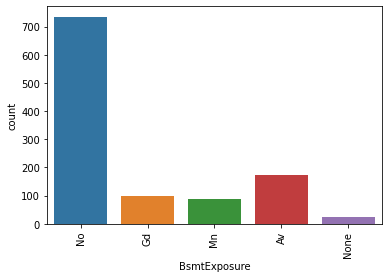

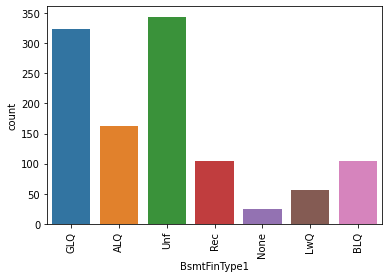

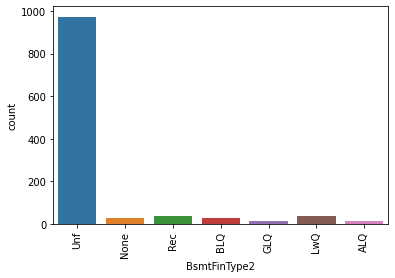

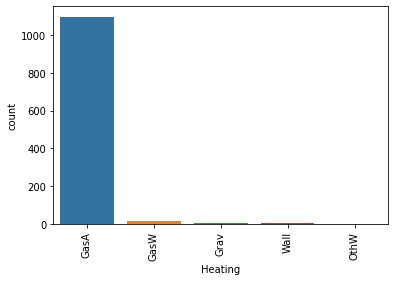

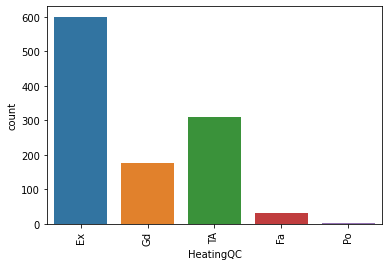

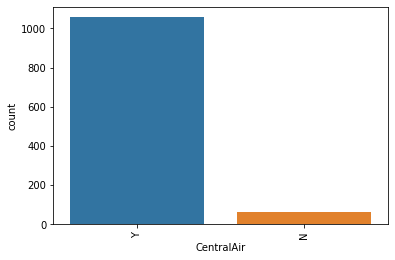

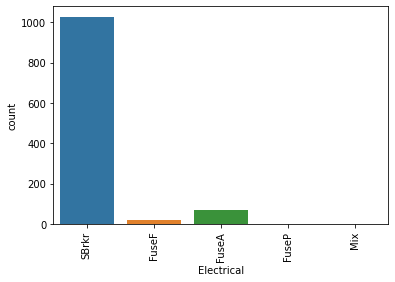

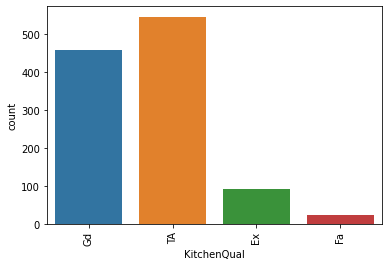

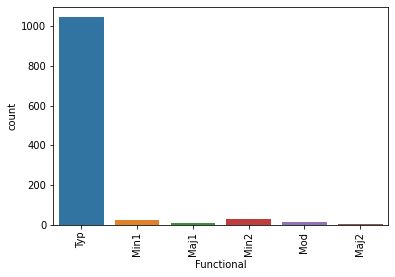

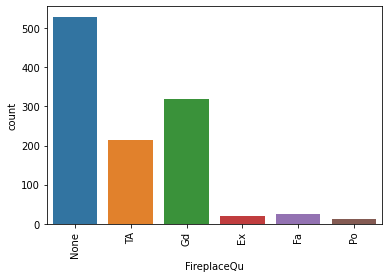

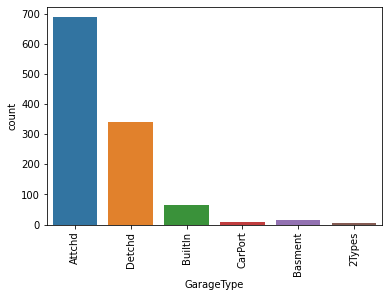

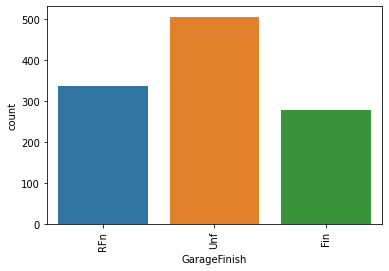

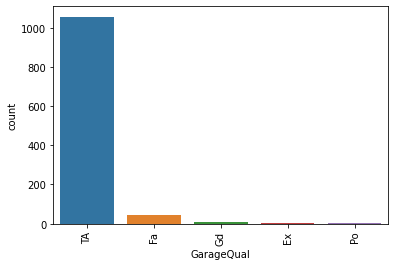

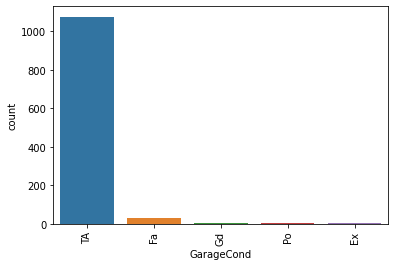

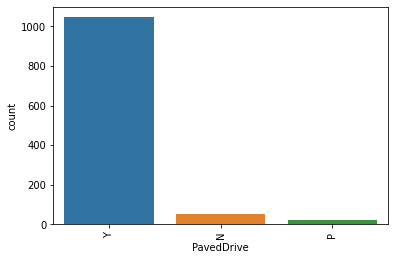

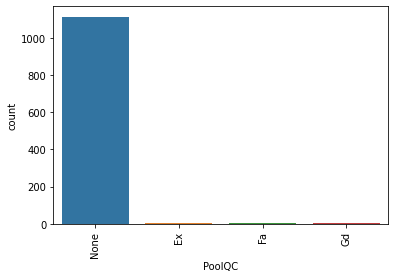

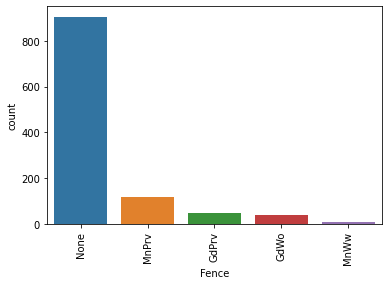

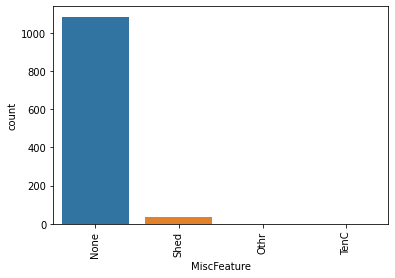

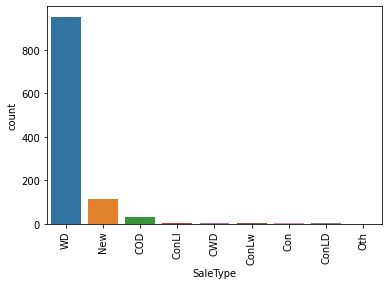

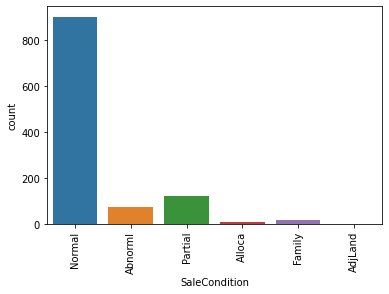

In [28]:
plt.figure(figsize=(10,5))
for cat in cat1:
    sns.countplot(x=df[cat])
    plt.xticks(rotation=90)
    plt.show()

#### Some data has much high frequency

In [14]:
print(df['Street'].value_counts())
print(df['Alley'].value_counts())
print(df['PoolQC'].value_counts())

Pave    1116
Grvl       4
Name: Street, dtype: int64
None    1043
Grvl      41
Pave      36
Name: Alley, dtype: int64
None    1114
Ex         2
Fa         2
Gd         2
Name: PoolQC, dtype: int64


In [15]:
# dropping street, alley, poolQC as they are highly freq
df = df.drop(['Street','Alley','PoolQC'], axis=1)

In [16]:
df['Electrical'].value_counts()/ len(df['Electrical'])

SBrkr    0.916964
FuseA    0.062500
FuseF    0.017857
FuseP    0.001786
Mix      0.000893
Name: Electrical, dtype: float64

In [17]:
df['RoofMatl'].value_counts()/len(df['RoofMatl'])

CompShg    0.984821
WdShngl    0.005357
Tar&Grv    0.005357
WdShake    0.001786
Membran    0.000893
Roll       0.000893
ClyTile    0.000893
Name: RoofMatl, dtype: float64

In [18]:
# dropping electrical and roof material too as they as highly freq
df = df.drop(['Electrical','RoofMatl'], axis=1)

In [19]:
df['MiscFeature'].value_counts()

None    1084
Shed      34
Othr       1
TenC       1
Name: MiscFeature, dtype: int64

In [20]:
df = df.drop('MiscFeature',axis=1)

#### Bi-Viariate Analysis 

In [21]:
cat2 = df.select_dtypes(include=['object'])
cat2.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

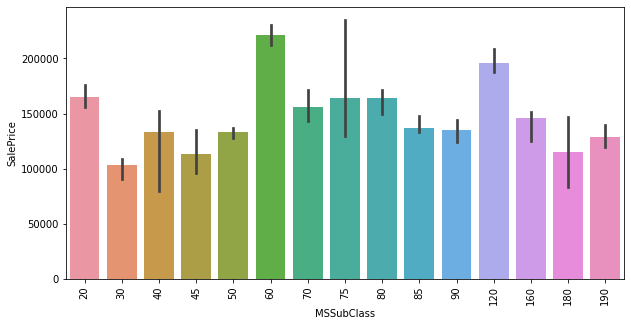

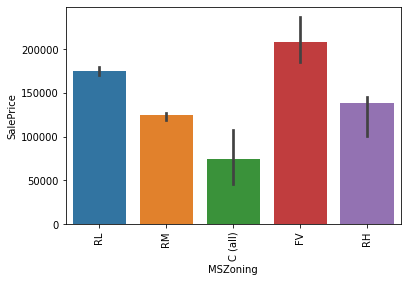

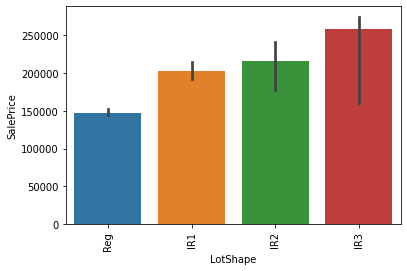

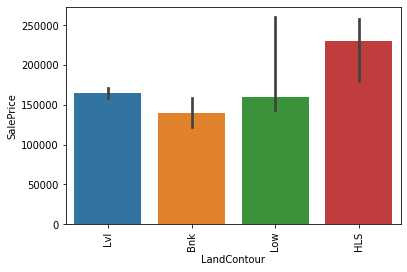

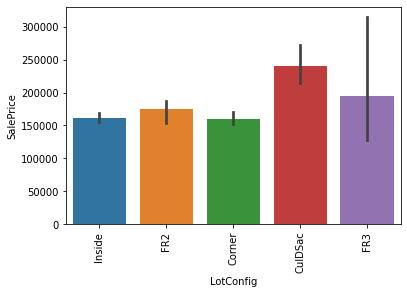

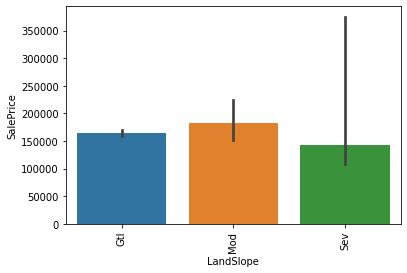

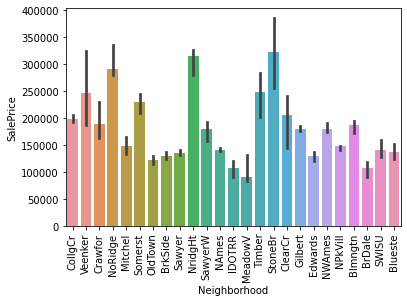

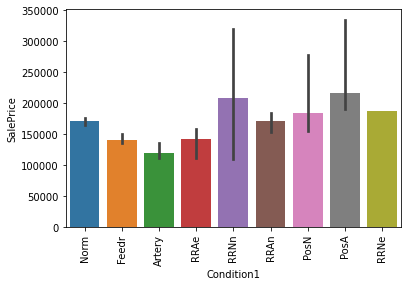

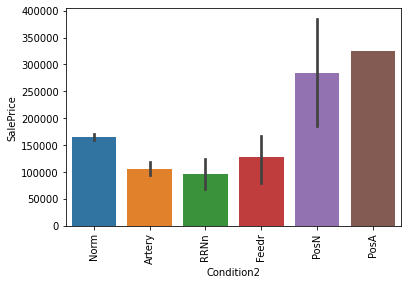

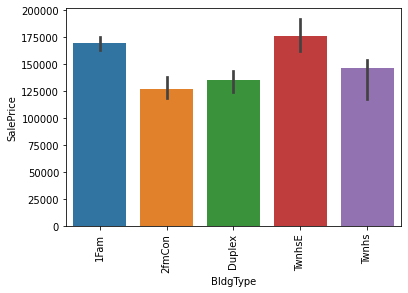

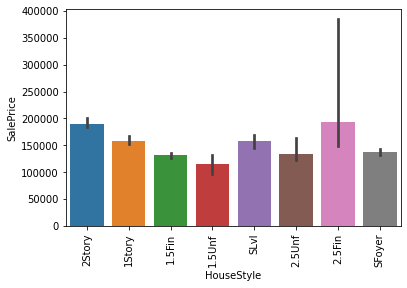

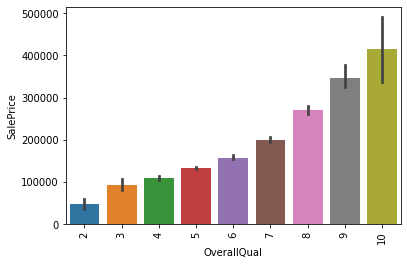

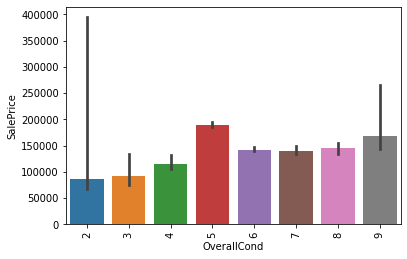

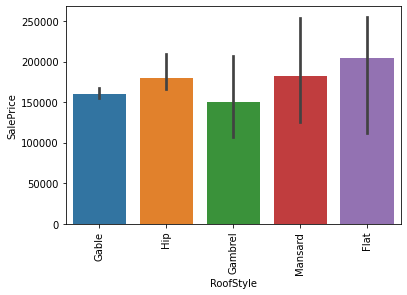

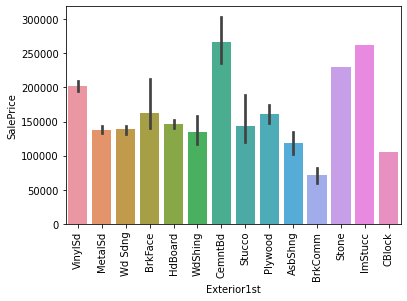

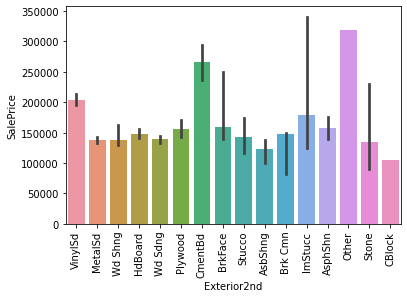

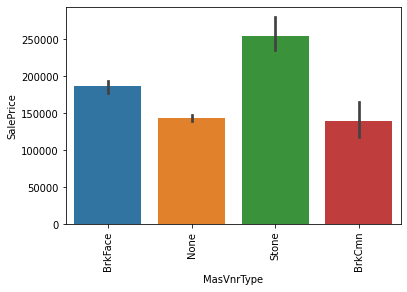

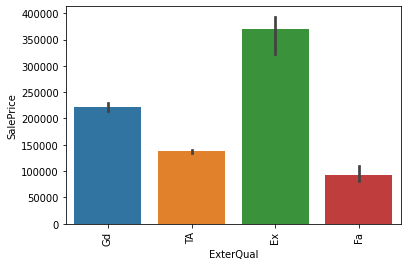

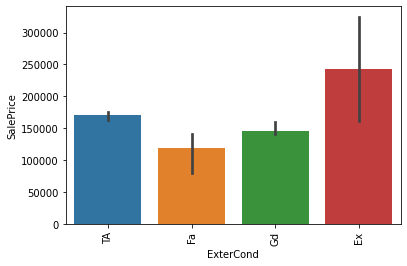

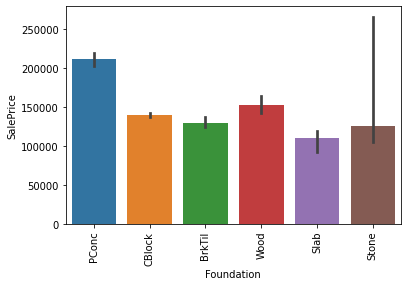

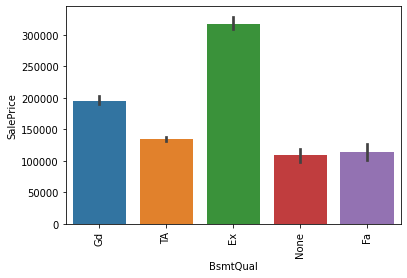

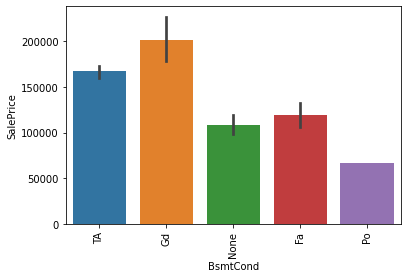

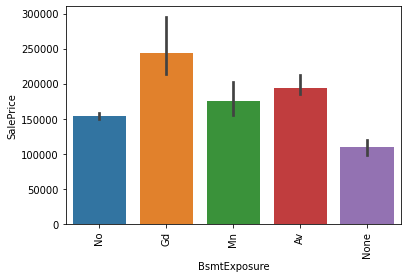

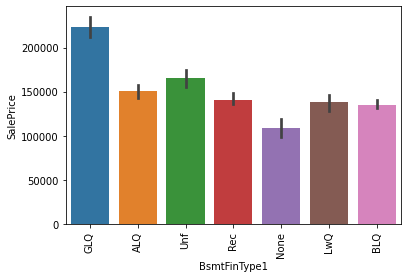

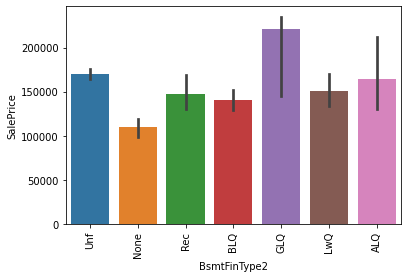

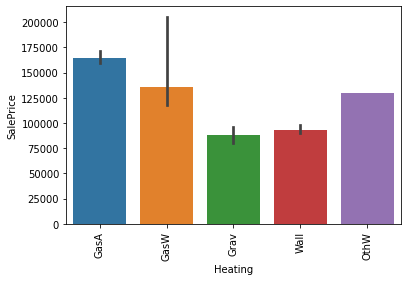

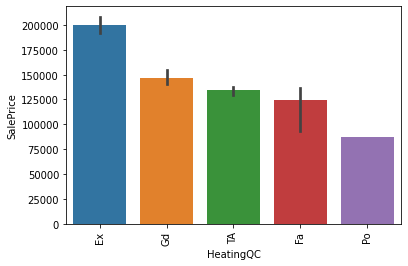

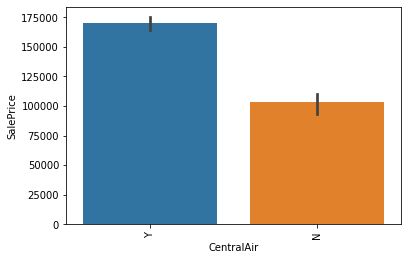

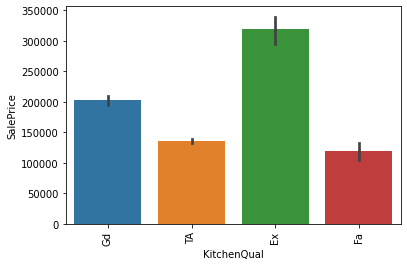

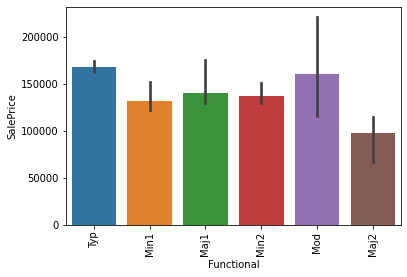

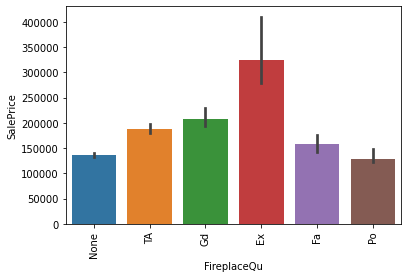

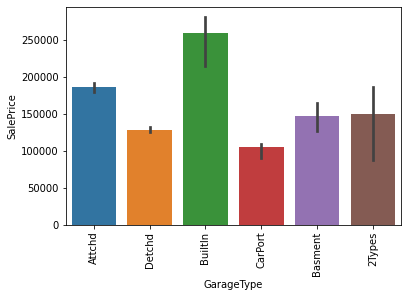

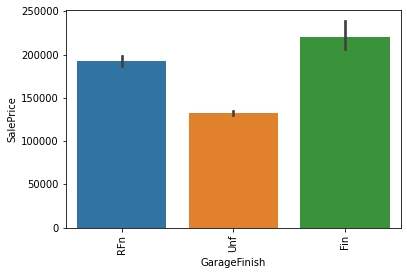

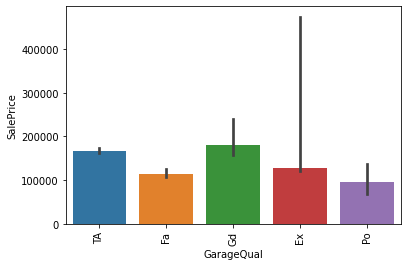

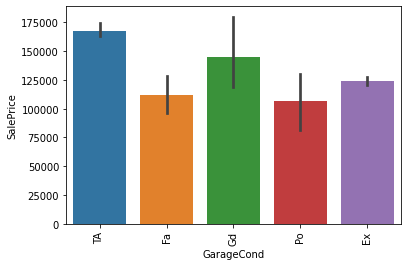

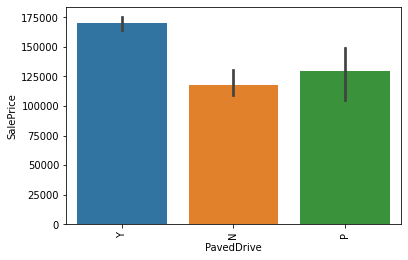

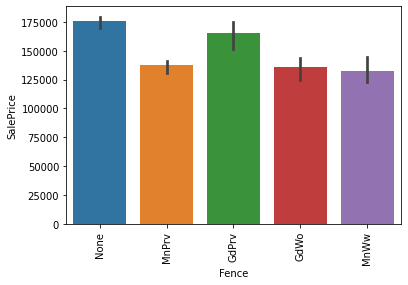

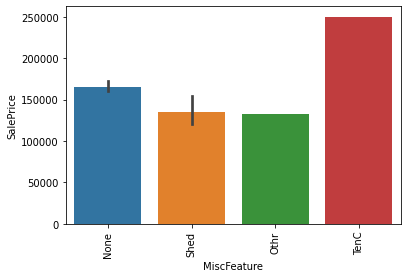

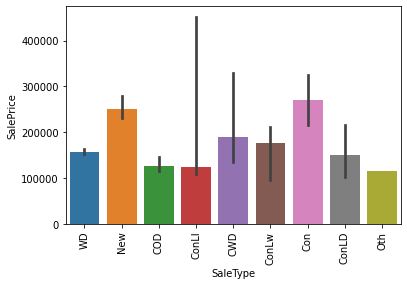

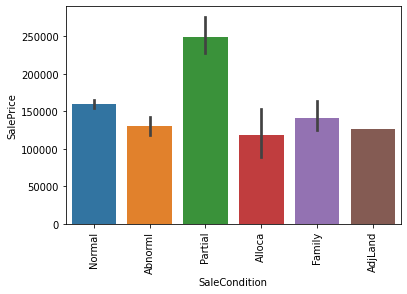

In [50]:
plt.figure(figsize=(10,5))
for cat in cat2:
    sns.barplot(x=df[cat], y=df['SalePrice'], estimator= np.median)
    plt.xticks(rotation=90)
    plt.show()

In [22]:
num1 = df.select_dtypes(include=['int64','float64'])
num1.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [54]:
num1.shape

(1120, 34)

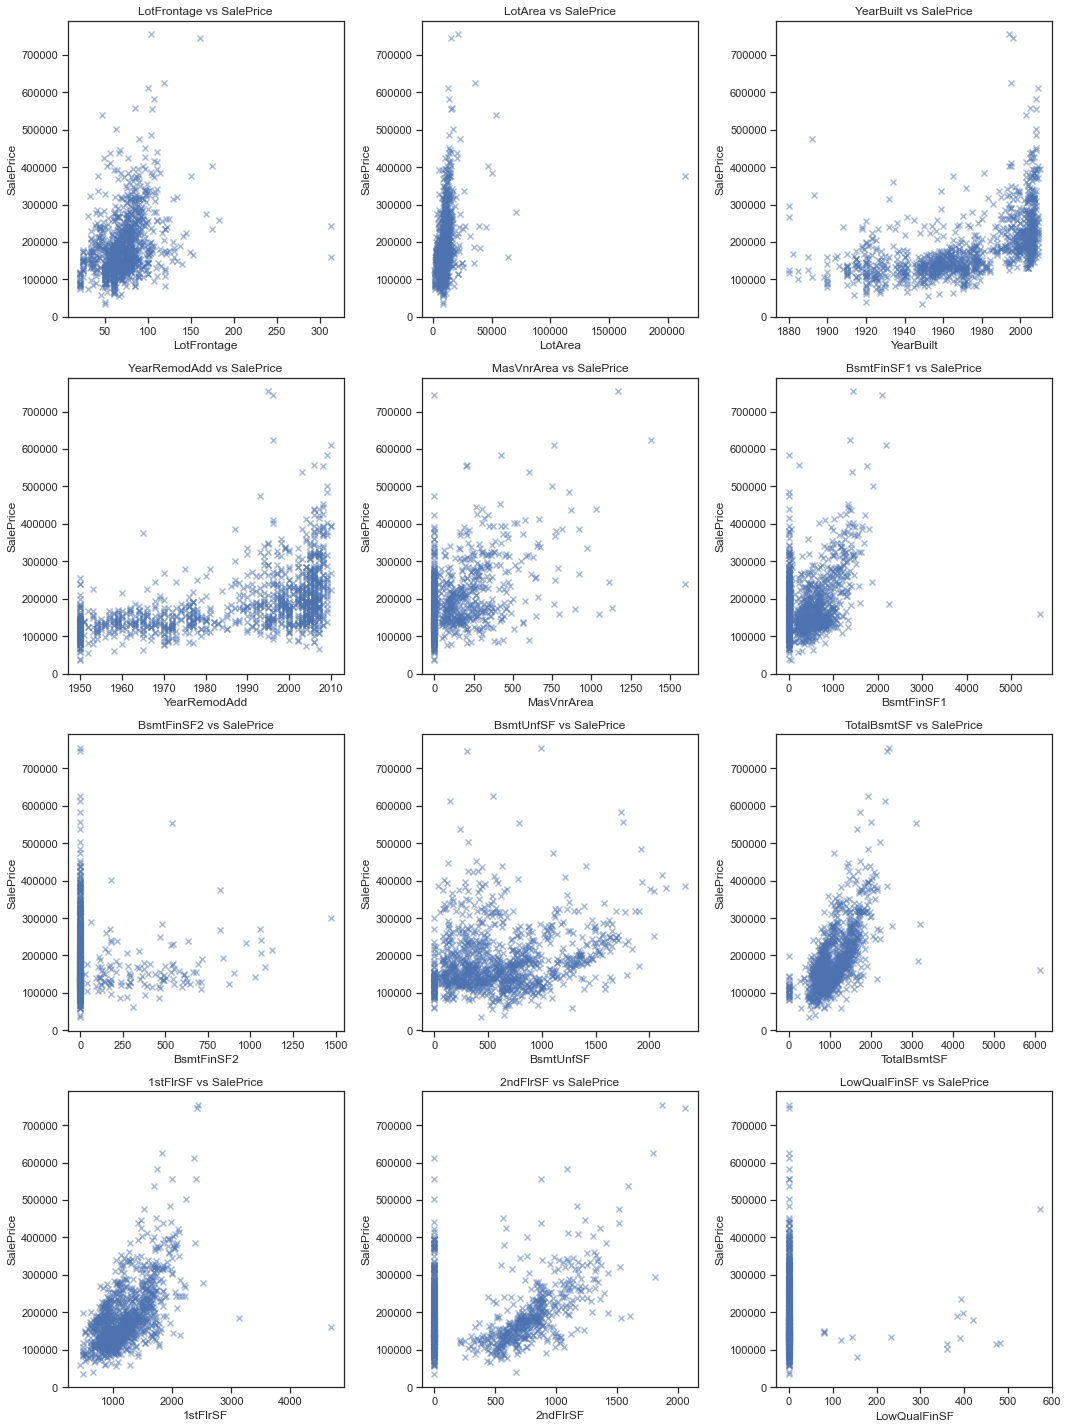

In [71]:
num_var1 = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
fig.tight_layout(pad=5.0)

axes = axes.flatten()

for i, var in enumerate(num_var1):
    x = df[var]
    y = df['SalePrice']
    

    row = i // 3
    col = i % 3
    

    axes[i].scatter(x, y, alpha=0.5, marker='x')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{var} vs SalePrice')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

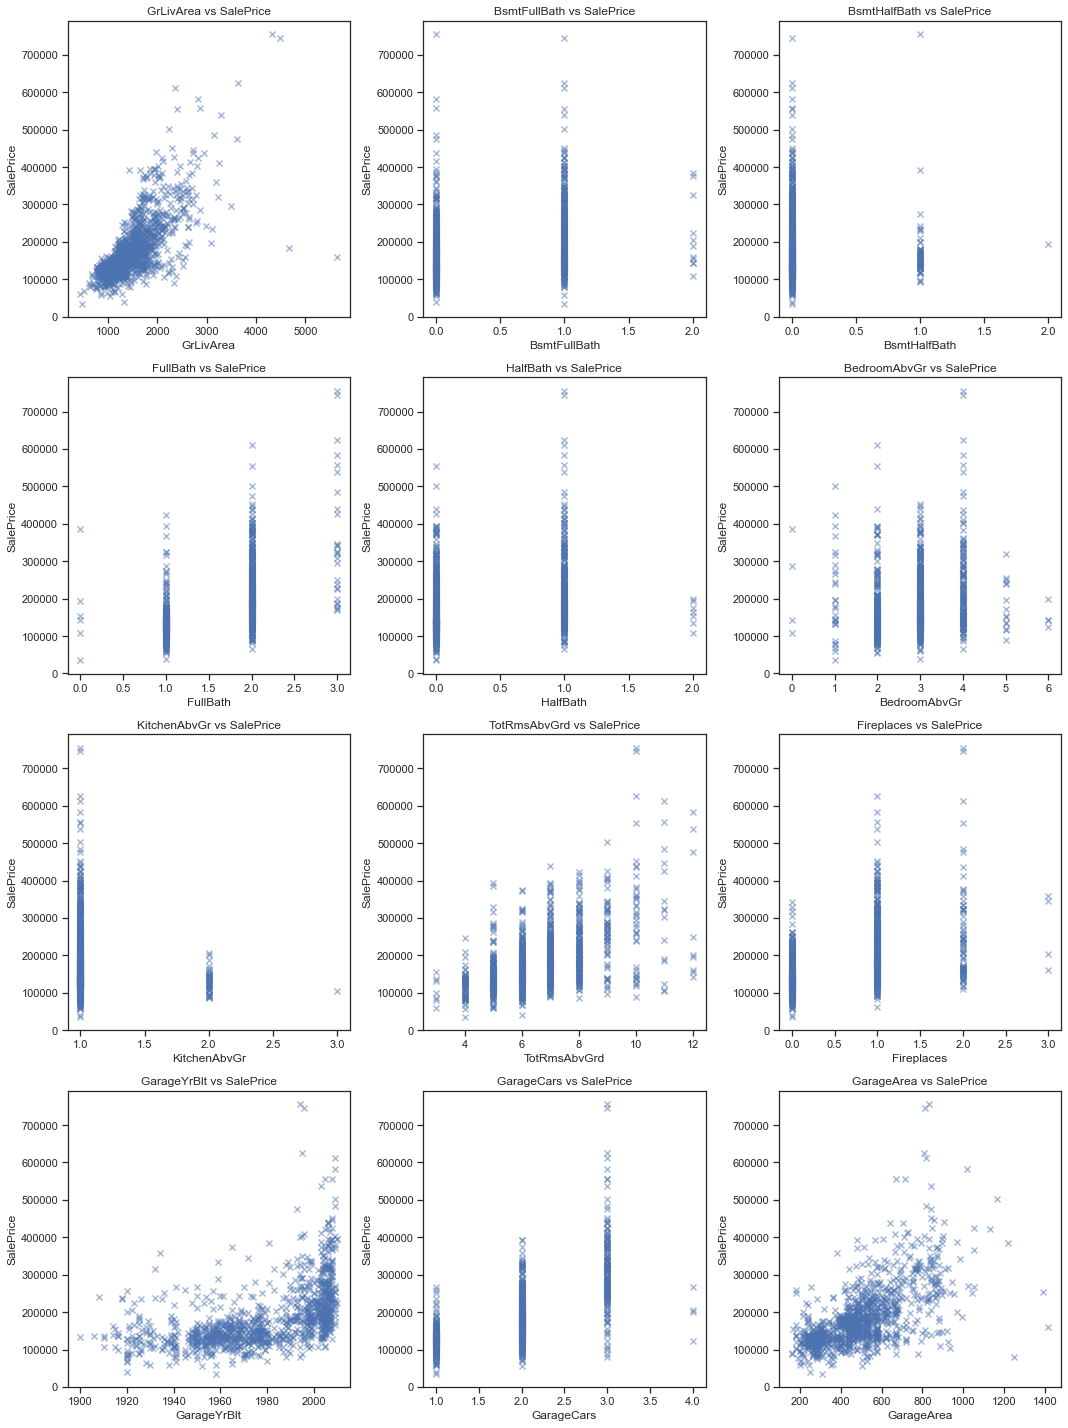

In [70]:
num_var2 = ['GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
fig.tight_layout(pad=5.0)

axes = axes.flatten()

for i, var in enumerate(num_var2):
    x = df[var]
    y = df['SalePrice']
    

    row = i // 3
    col = i % 3
    

    axes[i].scatter(x, y, alpha=0.5, marker='x')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{var} vs SalePrice')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

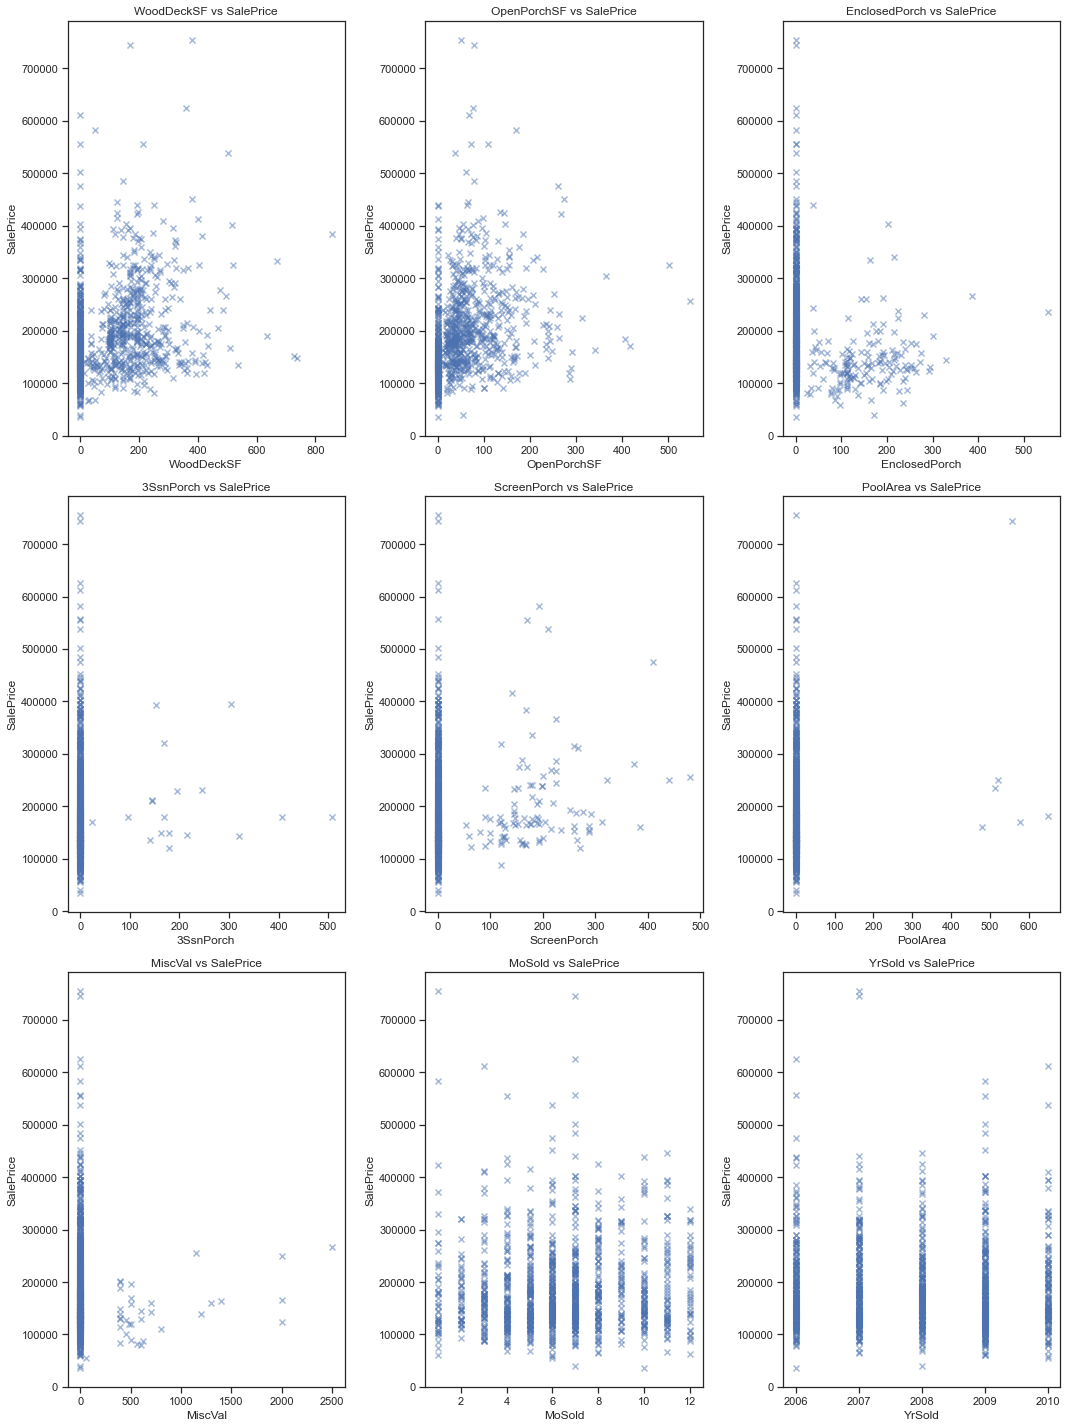

In [69]:
num_var3 = ['WoodDeckSF','OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
fig.tight_layout(pad=5.0)

axes = axes.flatten()

for i, var in enumerate(num_var3):
    x = df[var]
    y = df['SalePrice']
    

    row = i // 3
    col = i % 3
    

    axes[i].scatter(x, y, alpha=0.5, marker='x')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('SalePrice')
    axes[i].set_title(f'{var} vs SalePrice')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<AxesSubplot: >

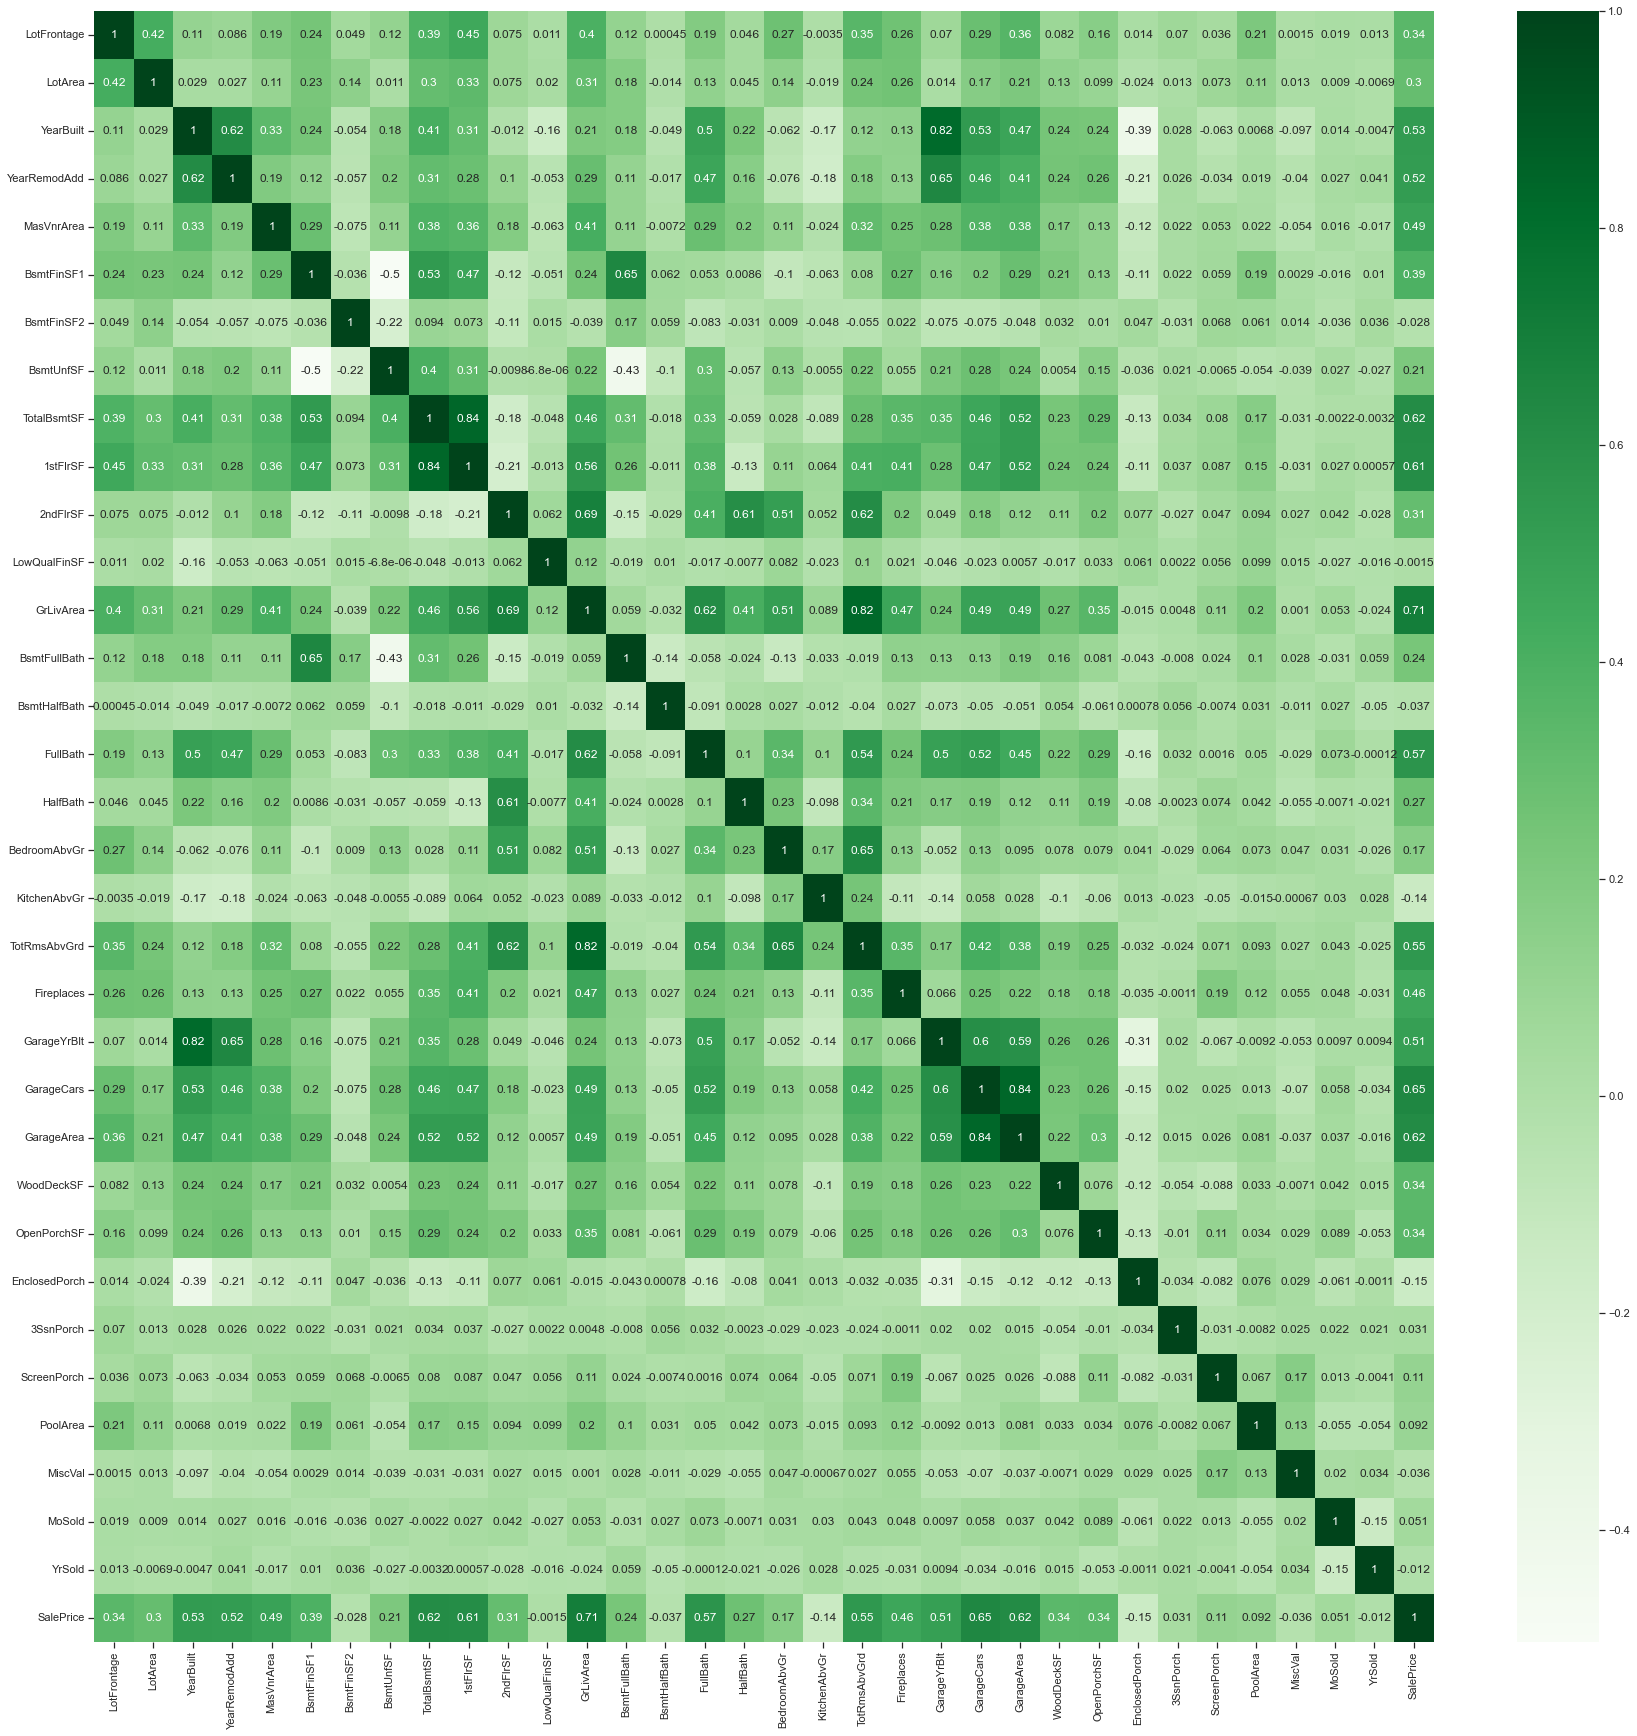

In [79]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

##### Target variable sale price has high correleation with  Garage Area, Garage year built, ground living area, Total basement area, 1st floor area, and full bathroom

In [23]:
print(df['GarageCars'].corr(df['GarageArea']))
print(df['YearBuilt'].corr(df['GarageYrBlt']))
print(df['TotRmsAbvGrd'].corr(df['GrLivArea']))

0.839625753446486
0.8233291766887415
0.8244260439289398


In [24]:
# dropping garage cars and garage year built
df = df.drop(['GarageCars','GarageYrBlt'], axis=1)


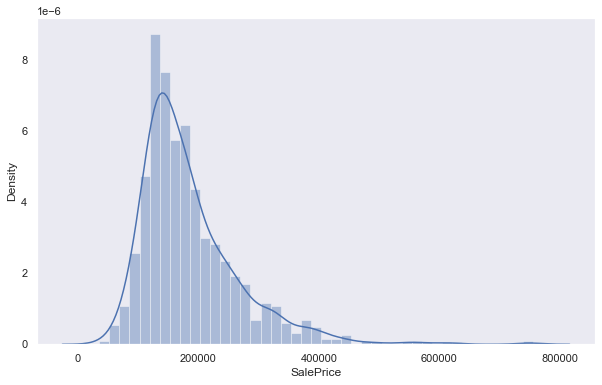

In [25]:
plt.figure(figsize=(10,6))
sns.set(style='dark')
sns.distplot(df['SalePrice'])
plt.show()

In [26]:
df['SalePrice'].skew()

1.9323038633229828

In [27]:
# since target variable is right skew converting into log
df['SalePrice'] = np.log(df['SalePrice'])


In [28]:
df['SalePrice'].skew()

0.3172047296130167

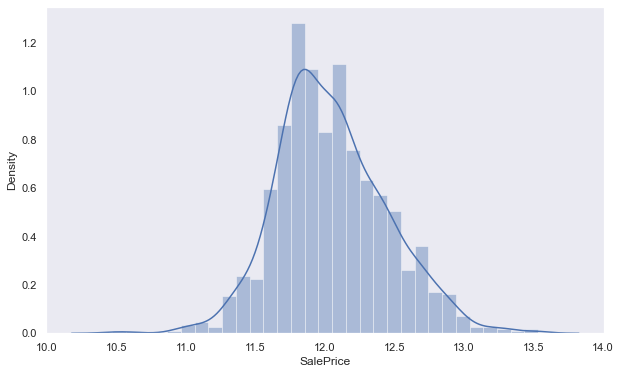

In [61]:
plt.figure(figsize=(10,6))
sns.set(style='dark')
sns.distplot(df['SalePrice'])
plt.show()

### Preparing data for Building model

In [29]:
cat = df.select_dtypes(include=['object'])
cat.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [30]:
cat = pd.get_dummies(cat, drop_first=True)
cat.shape

(1120, 219)

In [31]:
df = pd.concat([df, cat], axis=1)

In [32]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,1,0,0,0,1,0


In [33]:
df = df.drop(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence',  'SaleType', 'SaleCondition'], axis=1)

In [34]:
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [35]:
# dividing data into train-test split

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [36]:
# Standardising data with min- max scale

scaler = MinMaxScaler()
num_var = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces','GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [37]:
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice']

In [38]:
df_test[num_var] = scaler.transform(df_test[num_var])

In [39]:
X_test = df_test.drop('SalePrice', axis=1)
y_test = df_test['SalePrice']

In [40]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
651,0.133562,0.112063,0.465116,0.000000,0.00,0.000000,0.000000,0.350673,0.123568,0.074518,...,0,0,0,0,1,0,0,0,1,0
372,0.099315,0.084580,0.806202,0.566667,0.00,0.110383,0.107365,0.000000,0.121768,0.073813,...,0,0,0,0,1,0,0,0,1,0
814,0.082192,0.100027,0.294574,0.000000,0.00,0.000000,0.000000,0.318625,0.112275,0.058298,...,0,0,0,0,1,0,0,0,1,0
297,0.154110,0.087805,0.906977,0.800000,1.00,0.114989,0.000000,0.151417,0.159574,0.126234,...,0,0,0,0,1,0,0,0,1,0
339,0.154110,0.159802,0.604651,0.800000,0.11,0.103650,0.000000,0.292615,0.198854,0.182652,...,0,0,0,0,1,0,0,0,1,0


In [41]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [42]:
y_train_pred = reg.predict(X_train)

In [43]:
r2_score(y_true=y_train, y_pred=y_train_pred)

0.9355683958102665

In [44]:
y_test_pred = reg.predict(X_test)

In [45]:
r2_score(y_true=y_test, y_pred=y_test_pred)

-5.626740011650405e+20

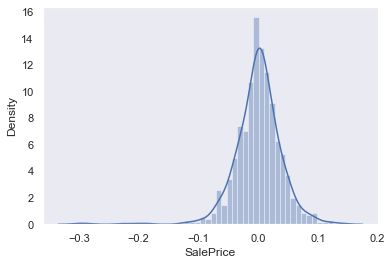

In [46]:
res = y_train - y_train_pred
sns.distplot(res)
plt.show()

#### residual error is left skew

### Ridge Regression


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [48]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0, 2.0, 3.0, 6.0, 7.0, 8.0, 
                   9.0, 10.0, 20, 50, 60, 100, 500]}

ridge = Ridge()

# for cross- validation
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.6, 0.8, 0.9, 1.0, 2.0, 3.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 20, 50, 60, 100, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [49]:
#printing the best parameter
model_cv.best_params_

{'alpha': 6.0}

In [50]:
alpha = 6
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)


Ridge(alpha=6)

In [51]:
ridge.coef_

array([ 4.77337298e-04,  2.45308215e-02,  1.06516932e-02,  3.53434578e-02,
        2.84148985e-02,  1.21122918e-02,  4.15097676e-03,  3.42240791e-02,
        2.40138082e-02,  5.28145115e-02,  5.23945263e-02, -6.02044017e-03,
        6.09205129e-02,  3.56521248e-02, -3.47669397e-03,  6.01011905e-02,
        4.21197808e-02,  2.27529420e-02, -2.62981882e-02,  6.63081452e-02,
        1.55348676e-02,  6.30002262e-02,  3.70013046e-02,  2.45385731e-02,
        2.58432918e-03,  2.53386718e-02,  2.76387744e-02, -2.80849467e-02,
       -1.22732840e-02,  1.60560673e-02, -1.03762801e-02, -2.68713876e-02,
       -9.03785189e-03, -3.31934326e-03,  1.07640861e-03, -6.64217626e-03,
        2.41629414e-02,  1.28371864e-02, -3.75261972e-03,  3.94543736e-03,
       -3.09331023e-03, -1.08860804e-02, -2.83572769e-02, -1.36091396e-02,
       -7.49777273e-03,  2.84984289e-02,  1.27689069e-02,  2.07031880e-02,
        4.34217370e-03,  1.07137475e-02, -2.96844570e-02, -4.54842728e-03,
        1.23384654e-02, -

In [52]:
y_rpred_train = ridge.predict(X_train)
y_rpred_test = ridge.predict(X_test)

metric = []
r2_train_lr = r2_score(y_true= y_train, y_pred= y_rpred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_true=y_test, y_pred=y_rpred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_rpred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_rpred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_rpred_train)
print(mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_rpred_test)
print(mse_test_lr)
metric.append(mse_test_lr)

0.9176289883559172
0.8709488977436952
1.599470258442019
1.395526209794098
0.0020401406357678817
0.004153351814863386


#### Lasso Regression

In [53]:
lasso = Lasso()

# for cross- validation
folds = 5
model_cv1 = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)

model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.6, 0.8, 0.9, 1.0, 2.0, 3.0, 6.0, 7.0,
                                   8.0, 9.0, 10.0, 20, 50, 60, 100, 500]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
model_cv1.best_params_

{'alpha': 0.0001}

In [55]:
alpha1 = 0.0001
lasso = Lasso(alpha=alpha1)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [56]:
lasso.coef_

array([-0.00000000e+00,  3.54276798e-03,  1.36556889e-02,  2.93121468e-02,
        2.60154700e-02, -0.00000000e+00,  0.00000000e+00,  2.69943930e-02,
        0.00000000e+00,  0.00000000e+00,  1.67640451e-02, -1.40693131e-02,
        3.20541819e-01,  4.00733782e-02, -0.00000000e+00,  6.88550992e-02,
        4.63589355e-02,  3.47997599e-03, -5.01346040e-02,  5.40545245e-02,
        3.30291953e-04,  8.11965308e-02,  4.52536833e-02,  2.08200596e-02,
        0.00000000e+00,  5.43819587e-02,  3.95980066e-02, -7.64058475e-02,
       -3.36497773e-03,  1.34001879e-02, -9.52946947e-03, -2.53849333e-02,
       -4.60794474e-03, -0.00000000e+00, -3.16460043e-03, -1.24217437e-02,
        1.45332177e-02,  0.00000000e+00, -0.00000000e+00,  4.97771997e-04,
       -0.00000000e+00, -2.73797190e-03, -2.57767414e-02,  0.00000000e+00,
       -0.00000000e+00,  5.01836205e-02,  2.23469441e-02,  2.80466286e-02,
        1.48755192e-02,  9.97475122e-03, -5.76878507e-02, -2.33851488e-03,
        5.40561598e-03, -

In [57]:
y_lpred_train = lasso.predict(X_train)
y_lpred_test = lasso.predict(X_test)

metric1 = []
r2_train_ls = r2_score(y_true= y_train, y_pred= y_lpred_train)
print(r2_train_ls)
metric1.append(r2_train_ls)

r2_test_ls = r2_score(y_true=y_test, y_pred=y_lpred_test)
print(r2_test_ls)
metric1.append(r2_test_ls)

rss1_ls = np.sum(np.square(y_train - y_lpred_train))
print(rss1_ls)
metric1.append(rss1_ls)

rss2_ls = np.sum(np.square(y_test - y_lpred_test))
print(rss2_ls)
metric1.append(rss2_ls)

mse_train_ls = mean_squared_error(y_train, y_lpred_train)
print(mse_train_ls)
metric1.append(mse_train_ls)

mse_test_ls = mean_squared_error(y_test, y_lpred_test)
print(mse_test_ls)
metric1.append(mse_test_ls)

0.923935176688509
0.87334643815472
1.4770174624790688
1.369599809909651
0.0018839508449988124
0.004076189910445389


In [58]:
# creating a table
lr_table = {'metric' : ['R2 Score(train)','R2 Score(test)','RSS (train)','RSS (test)','MSE (tain)','MSE (test)']}

lr_metric = pd.DataFrame(lr_table)

rg_metric = pd.Series(metric, name='Ridge Regression')
ls_metric = pd.Series(metric1, name='Lasso Regression')

finally_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis=1)
finally_metric

,metric,Ridge Regression,Lasso Regression
0,R2 Score(train),0.917629,0.923935
1,R2 Score(test),0.870949,0.873346
2,RSS (train),1.599470,1.477017
3,RSS (test),1.395526,1.369600
4,MSE (tain),0.002040,0.001884
5,MSE (test),0.004153,0.004076


### Lasso is better than Ridge here

In [59]:
# observing model cofficients
betas = pd.DataFrame(index=X_train.columns)


In [60]:
betas.rows = X_train.columns

In [61]:
betas['Ridge'] = ridge.coef_
betas['lasso'] = lasso.coef_

In [62]:
betas.head(68)

,Ridge,lasso
LotFrontage,0.000477,-0.000000
LotArea,0.024531,0.003543
YearBuilt,0.010652,0.013656
YearRemodAdd,0.035343,0.029312
MasVnrArea,0.028415,0.026015
...,...,...
Neighborhood_BrkSide,0.004985,0.002254
Neighborhood_ClearCr,0.013941,0.018677
Neighborhood_CollgCr,-0.004081,0.000000
Neighborhood_Crawfor,0.043192,0.051785


### Most important predictor variables

In [63]:
betas['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9           0.075180
TotRmsAbvGrd            0.066308
GarageArea              0.063000
GrLivArea               0.060921
FullBath                0.060101
1stFlrSF                0.052815
2ndFlrSF                0.052395
Neighborhood_Crawfor    0.043192
HalfBath                0.042120
Neighborhood_NoRidge    0.041897
Name: Ridge, dtype: float64

In [64]:
## To interpret the ridge coefficients in terms of target, we have to take inverse log (i.e. e to the power) of betas
ridge_coeffs = np.exp(betas['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9           1.078079
TotRmsAbvGrd            1.068556
GarageArea              1.065027
GrLivArea               1.062814
FullBath                1.061944
1stFlrSF                1.054234
2ndFlrSF                1.053791
Neighborhood_Crawfor    1.044139
HalfBath                1.043019
Neighborhood_NoRidge    1.042787
Name: Ridge, dtype: float64

In [65]:
betas['lasso'].sort_values(ascending=False)[:10]

GrLivArea               0.320542
OverallQual_9           0.099757
GarageArea              0.081197
FullBath                0.068855
3SsnPorch               0.054382
TotRmsAbvGrd            0.054055
Neighborhood_Crawfor    0.051785
Neighborhood_StoneBr    0.050229
MSZoning_FV             0.050184
HalfBath                0.046359
Name: lasso, dtype: float64

In [66]:
## To interpret the lasso coefficients in terms of target, we have to take inverse log (i.e. 10 to the power) of betas
lasso_coeffs = np.exp(betas['lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea               1.377874
OverallQual_9           1.104902
GarageArea              1.084584
FullBath                1.071281
3SsnPorch               1.055888
TotRmsAbvGrd            1.055542
Neighborhood_Crawfor    1.053150
Neighborhood_StoneBr    1.051512
MSZoning_FV             1.051464
HalfBath                1.047450
Name: lasso, dtype: float64

### Conclusion
* Variables significant in predicting the house price are :- 
* "GrLivArea","OverallQual_9","GarageArea","FullBath""3SsnPorch","TotRmsAbvGrd","Neighborhood_Crawfor","Neighborhood_StoneBr", "MSZoning_FV", "HalfBath"